In [1]:
%pip install numpy
%pip install scikit-image
%pip install matplotlib
%pip install pillow
%pip install scipi
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement scipi (from versions: none)
ERROR: No matching distribution found for scipi
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
import skimage.io as skio
import cv2
import math

from skimage.transform import rescale
from skimage.filters import sobel
from skimage import img_as_ubyte
from skimage import img_as_uint
from PIL import Image, ImageOps
from scipy import signal

# Part 1

## Part 1.1

In [3]:
# helper functions

def pad_zeros(img, h, w):
    """pad image with zeros given kernel (w, h)"""
    top = h // 2
    bottom = h - 1 - top
    left = w // 2
    right = w - 1 - left
    return np.pad(img, ((top, bottom), (left, right)), mode="constant", constant_values=0)

def PIL_shrink(img, n):
    """shrink pillow image by 1/n"""
    return img.resize((img.width // n, img.height // n), Image.Resampling.LANCZOS)

In [4]:
def c4loops(image, kernel):
    img = np.asarray(image, dtype=np.float64)
    ker = np.asarray(kernel, dtype=np.float64)
    ih, iw = img.shape
    kh, kw = ker.shape

    ker_flipped = np.flip(ker)

    img_padded = pad_zeros(img, kh, kw)

    out = np.zeros_like(img)
    for i in range(ih):
        for j in range(iw):
            val = 0.0
            for u in range(kh):
                for v in range(kw):
                    val += img_padded[i + u, j + v] * ker_flipped[u, v]
            out[i, j] = val
    return out

def c2loops(image, kernel):
    img = np.asarray(image, dtype=np.float64)
    ker = np.asarray(kernel, dtype=np.float64)
    ih, iw = img.shape
    kh, kw = ker.shape

    ker_flipped = np.flip(ker)

    img_padded = pad_zeros(img, kh, kw)

    out = np.zeros_like(img)
    for i in range(ih):
        for j in range(iw):
            out[i, j] = np.sum(img_padded[i:i+kh, j:j+kw] * ker_flipped)
    return out

In [5]:
box9x9 = np.ones((9, 9), dtype=np.float64) / (81)    # 9x9 box filter
Dx = np.array([[1, -1]], dtype=np.float64)           # finite difference x
Dy = np.array([[1], [-1]], dtype=np.float64)         # finite difference y

In [6]:
me_grayscale = Image.open("../../img/me.jpg").convert("L")

9x9 box filter:


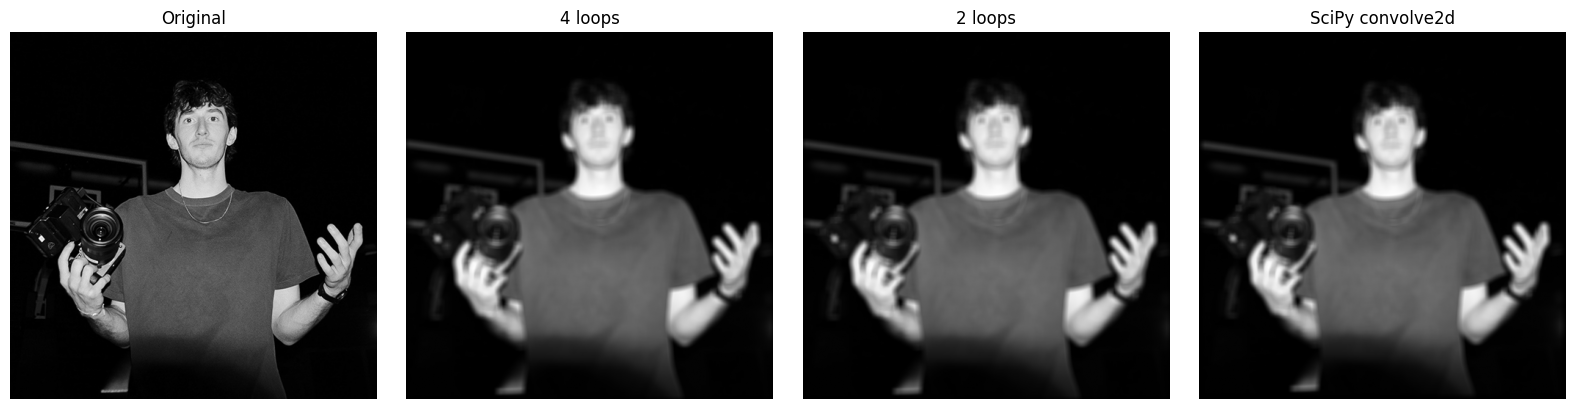

In [7]:
me_box_4loops = c4loops(me_grayscale, box9x9)
me_box_2loops = c2loops(me_grayscale, box9x9)
me_box_scipy = signal.convolve2d(me_grayscale, box9x9)

# display
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(me_grayscale, cmap="gray")
axes[0].set_title("Original")

axes[1].imshow(me_box_4loops, cmap="gray")
axes[1].set_title("4 loops")

axes[2].imshow(me_box_2loops, cmap="gray")
axes[2].set_title("2 loops")

axes[3].imshow(me_box_scipy, cmap="gray")
axes[3].set_title("SciPy convolve2d")

for a in axes:
    a.axis("off")

print("9x9 box filter:")
plt.tight_layout()
plt.show()

D_x:


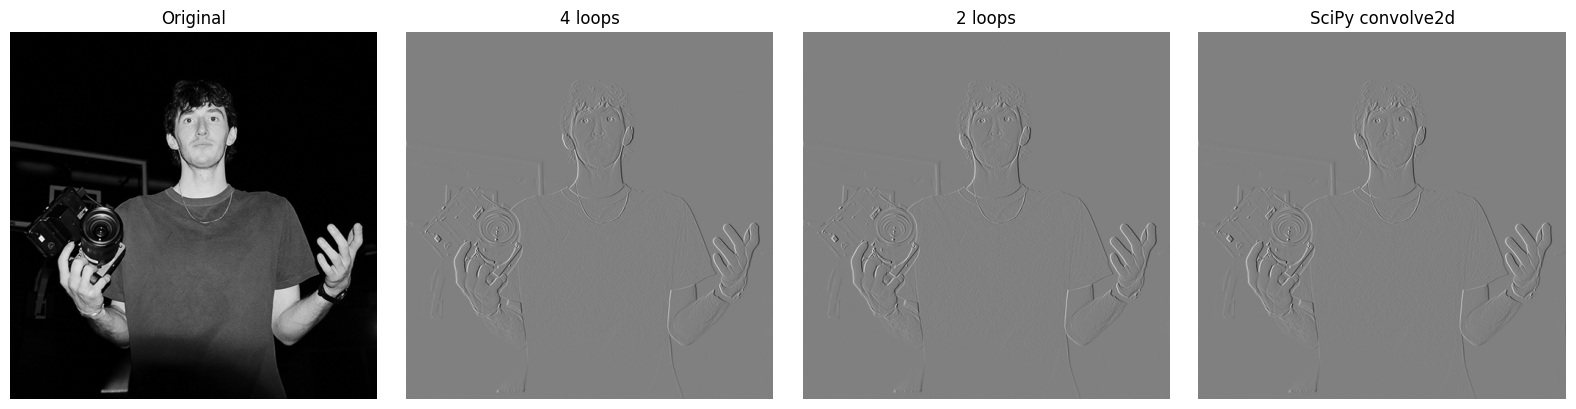

In [8]:
me_Dx_4loops = c4loops(me_grayscale, Dx)
me_Dx_2loops = c2loops(me_grayscale, Dx)
me_Dx_scipy = signal.convolve2d(me_grayscale, Dx)

# display
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(me_grayscale, cmap="gray")
axes[0].set_title("Original")

axes[1].imshow(me_Dx_4loops, cmap="gray")
axes[1].set_title("4 loops")

axes[2].imshow(me_Dx_2loops, cmap="gray")
axes[2].set_title("2 loops")

axes[3].imshow(me_Dx_scipy, cmap="gray")
axes[3].set_title("SciPy convolve2d")

for a in axes:
    a.axis("off")

print("D_x:")
plt.tight_layout()
plt.show()

D_y:


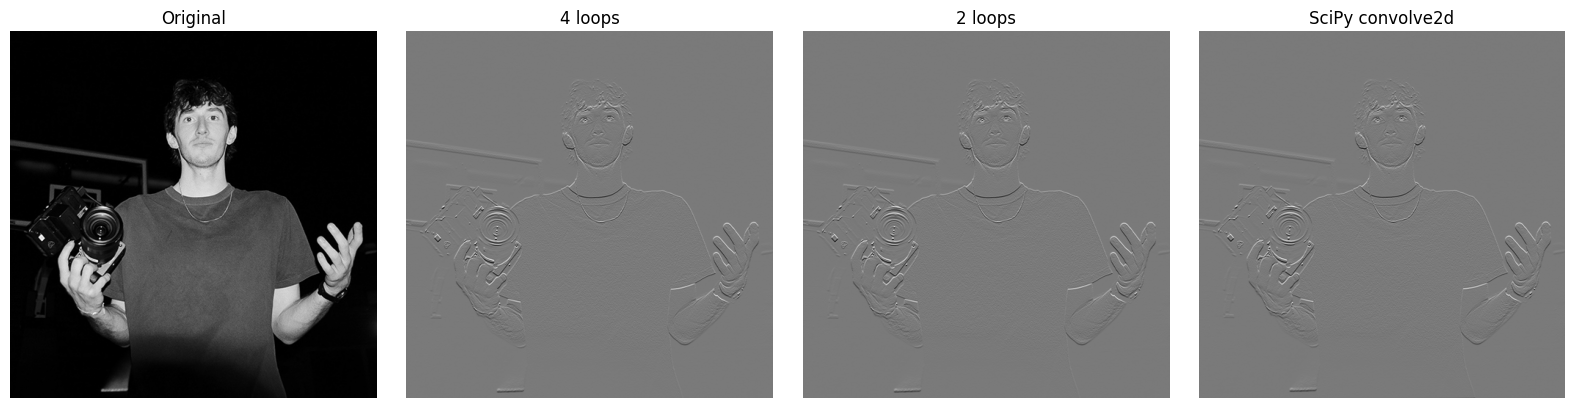

In [9]:
me_Dy_4loops = c4loops(me_grayscale, Dy)
me_Dy_2loops = c2loops(me_grayscale, Dy)
me_Dy_scipy = signal.convolve2d(me_grayscale, Dy)

# display
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(me_grayscale, cmap="gray")
axes[0].set_title("Original")

axes[1].imshow(me_Dy_4loops, cmap="gray")
axes[1].set_title("4 loops")

axes[2].imshow(me_Dy_2loops, cmap="gray")
axes[2].set_title("2 loops")

axes[3].imshow(me_Dy_scipy, cmap="gray")
axes[3].set_title("SciPy convolve2d")

for a in axes:
    a.axis("off")

print("D_y:")
plt.tight_layout()
plt.show()

## Part 1.2

In [10]:
cameraman_grayscale = Image.open("../../img/cameraman.jpg").convert("L")

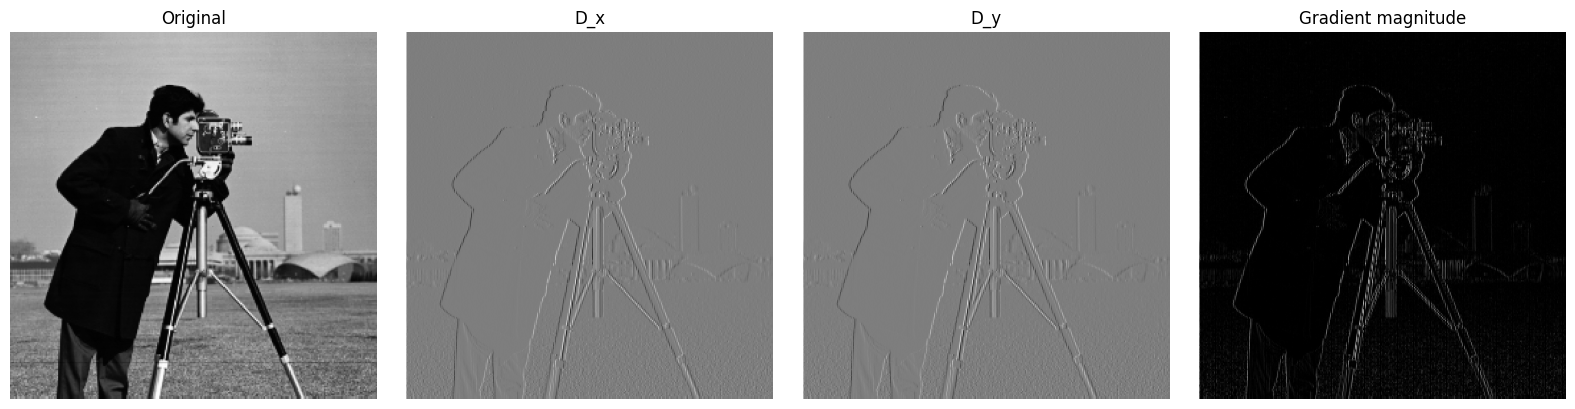

In [11]:
cameraman_Dx = signal.convolve2d(cameraman_grayscale, Dx, mode="same")
cameraman_Dy = signal.convolve2d(cameraman_grayscale, Dx, mode="same")
cameraman_gm = np.sqrt(cameraman_Dx**2 + cameraman_Dy**2)
cameraman_gm_norm = cameraman_gm / cameraman_gm.max()

# display
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(cameraman_grayscale, cmap="gray")
axes[0].set_title("Original")

axes[1].imshow(cameraman_Dx, cmap="gray")
axes[1].set_title("D_x")

axes[2].imshow(cameraman_Dy, cmap="gray")
axes[2].set_title("D_y")

axes[3].imshow(cameraman_gm_norm, cmap="gray")
axes[3].set_title("Gradient magnitude")

for a in axes:
    a.axis("off")

plt.tight_layout()
plt.show()

Edge image with threshold 0.35:


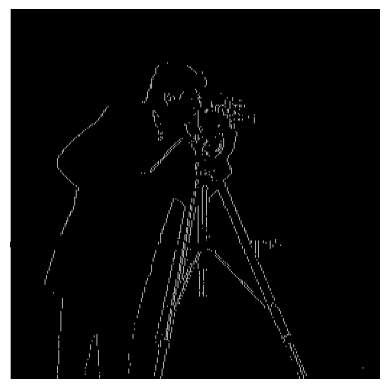

In [12]:
t = 0.35
cameraman_edges = (cameraman_gm_norm > t).astype(float)

print(f"Edge image with threshold {t}:")
plt.imshow(cameraman_edges, cmap="gray")
plt.axis("off")
plt.show()

## Part 1.3

In [13]:
def gaussian2d(ksize=9, sigma=1.6):
    g1d = cv2.getGaussianKernel(ksize=ksize, sigma=sigma)
    G = g1d @ g1d.T
    return G.astype(np.float64)

G = gaussian2d(ksize=9, sigma=1.6)

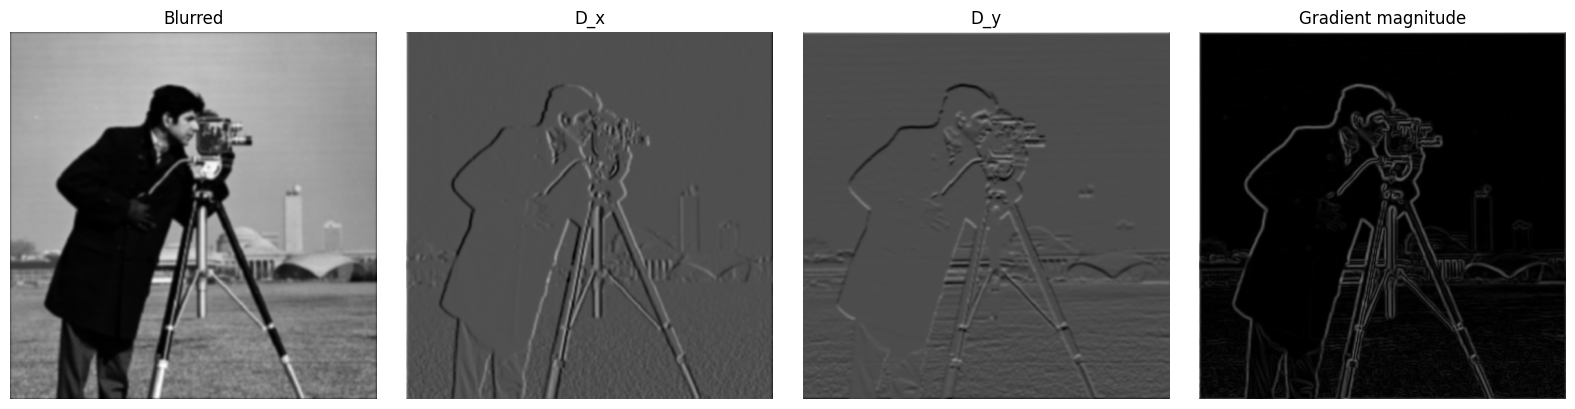

In [14]:
cameraman_blurred = signal.convolve2d(cameraman_grayscale, G, mode="same")

cameraman_Dx = signal.convolve2d(cameraman_blurred, Dx, mode="same")
cameraman_Dy = signal.convolve2d(cameraman_blurred, Dy, mode="same")
cameraman_gm = np.sqrt(cameraman_Dx**2 + cameraman_Dy**2)
cameraman_gm_norm = cameraman_gm / cameraman_gm.max()

# display
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(cameraman_blurred, cmap="gray")
axes[0].set_title("Blurred")

axes[1].imshow(cameraman_Dx, cmap="gray")
axes[1].set_title("D_x")

axes[2].imshow(cameraman_Dy, cmap="gray")
axes[2].set_title("D_y")

axes[3].imshow(cameraman_gm_norm, cmap="gray")
axes[3].set_title("Gradient magnitude")

for a in axes:
    a.axis("off")

plt.tight_layout()
plt.show()

Edge image with threshold 0.15:


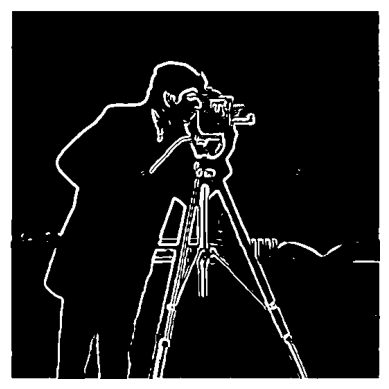

In [15]:
t = 0.15
cameraman_edges = (cameraman_gm_norm > t).astype(float)

print(f"Edge image with threshold {t}:")
plt.imshow(cameraman_edges, cmap="gray")
plt.axis("off")
plt.show()

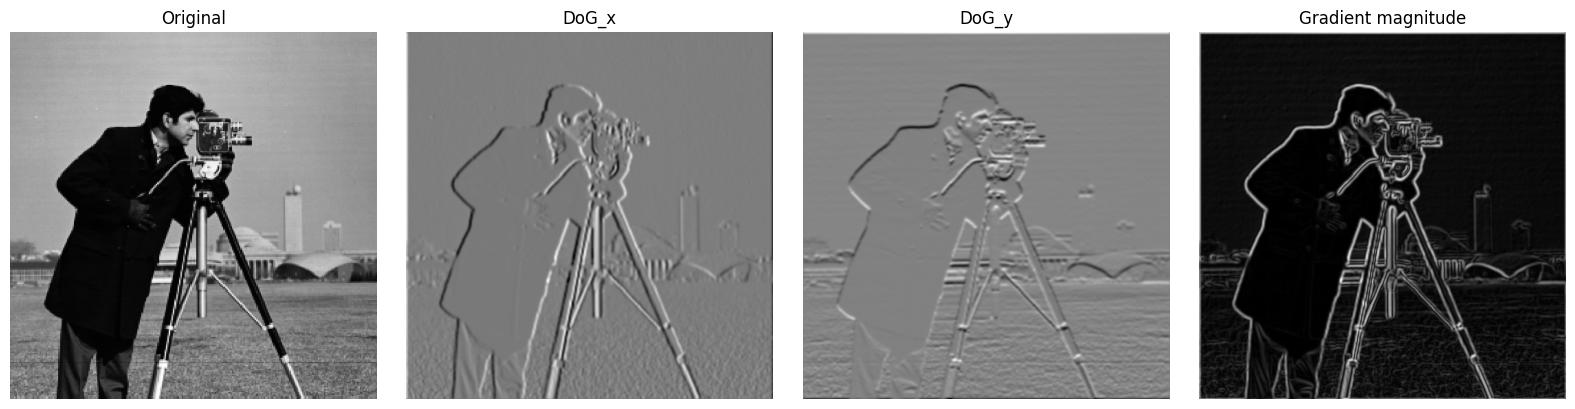

In [16]:
# using a single convolution instead of 2

DoG_x = signal.convolve2d(G, Dx, mode="same")
DoG_y = signal.convolve2d(G, Dy, mode="same")

cameraman_Dx = signal.convolve2d(cameraman_grayscale, DoG_x, mode="same")
cameraman_Dy = signal.convolve2d(cameraman_grayscale, DoG_y, mode="same")
cameraman_gm = np.sqrt(cameraman_Dx**2 + cameraman_Dy**2)
cameraman_gm_norm = cameraman_gm / cameraman_gm.max()

# display
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(cameraman_grayscale, cmap="gray")
axes[0].set_title("Original")

axes[1].imshow(cameraman_Dx, cmap="gray")
axes[1].set_title("DoG_x")

axes[2].imshow(cameraman_Dy, cmap="gray")
axes[2].set_title("DoG_y")

axes[3].imshow(cameraman_gm_norm, cmap="gray")
axes[3].set_title("Gradient magnitude")

for a in axes:
    a.axis("off")

plt.tight_layout()
plt.show()

Edge image with threshold 0.35:


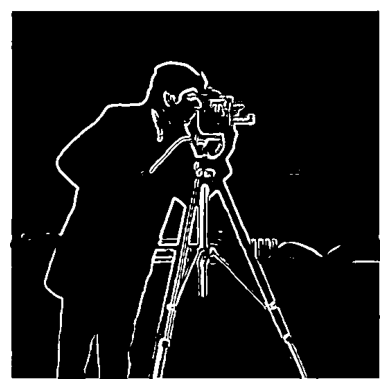

In [17]:
t = 0.35
cameraman_edges = (cameraman_gm_norm > t).astype(float)

print(f"Edge image with threshold {t}:")
plt.imshow(cameraman_edges, cmap="gray")
plt.axis("off")
plt.show()

# Part 2

## Part 2.1

In [18]:
def unsharp_mask(image, ksize=9, sigma=1.6, boundary="symm", amount=1):
    img = np.asarray(image, dtype=np.float64)
    img = img / img.max()

    G = gaussian2d(ksize, sigma)

    if img.ndim == 2:
        blur = signal.convolve2d(img, G, mode="same", boundary=boundary, fillvalue=0.0)
    elif img.ndim == 3:
        blur = np.stack([signal.convolve2d(img[...,c], G, mode="same", boundary=boundary, fillvalue=0.0) for c in range(3)], axis=2)

    high = img - blur
    sharp = img + amount * high
    sharp = np.clip(sharp, 0.0, 1.0)
    
    return img, blur, high, sharp

def process_img(image, ksize=9, sigma=1.6, boundary="symm", amount=1):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    img, blur, high, sharp = unsharp_mask(image, ksize, sigma, boundary, amount)
    
    axes[0].imshow(img)
    axes[0].set_title("Original")
    
    axes[1].imshow(blur)
    axes[1].set_title("Blurred")
    
    axes[2].imshow(high, cmap="gray")
    axes[2].set_title("High frequencies")
    
    axes[3].imshow(sharp)
    axes[3].set_title("Sharpened")
    
    for a in axes:
        a.axis("off")
    
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5821136128708392..0.4728451582765494].


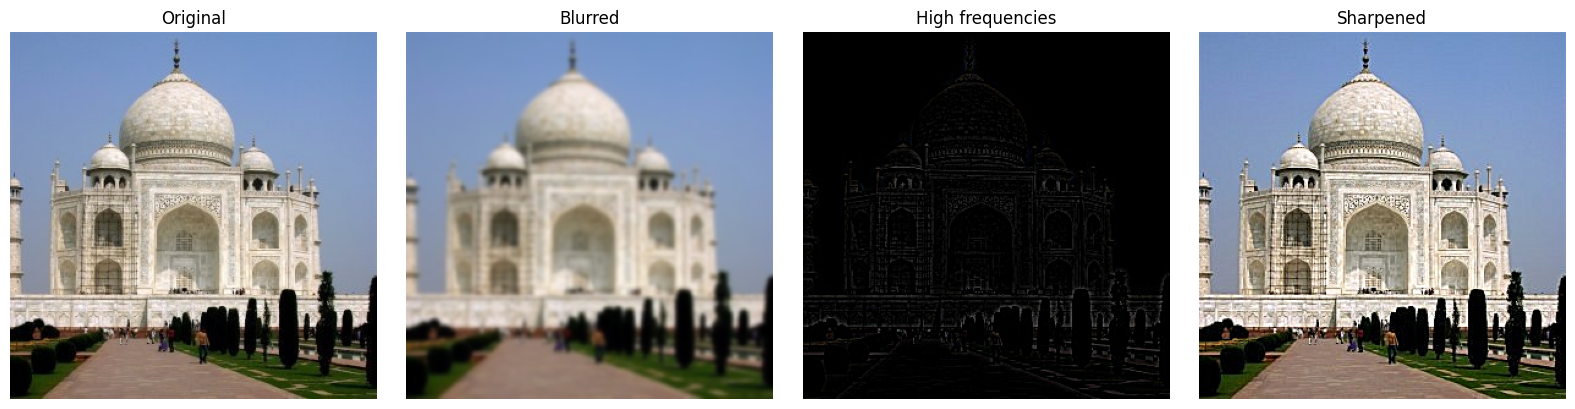

In [19]:
taj = np.asarray(Image.open("../../img/taj.jpg"))
process_img(taj)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5153117443266375..0.506098793456331].


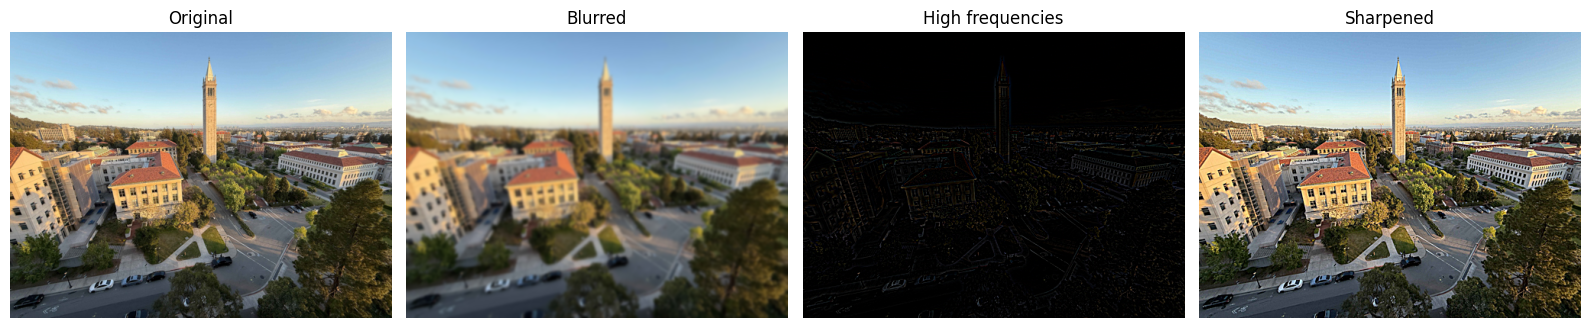

In [20]:
campanile = np.asarray(Image.open("../../img/campanile.jpg"))
process_img(campanile)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4200378500623224..0.45789652615538756].


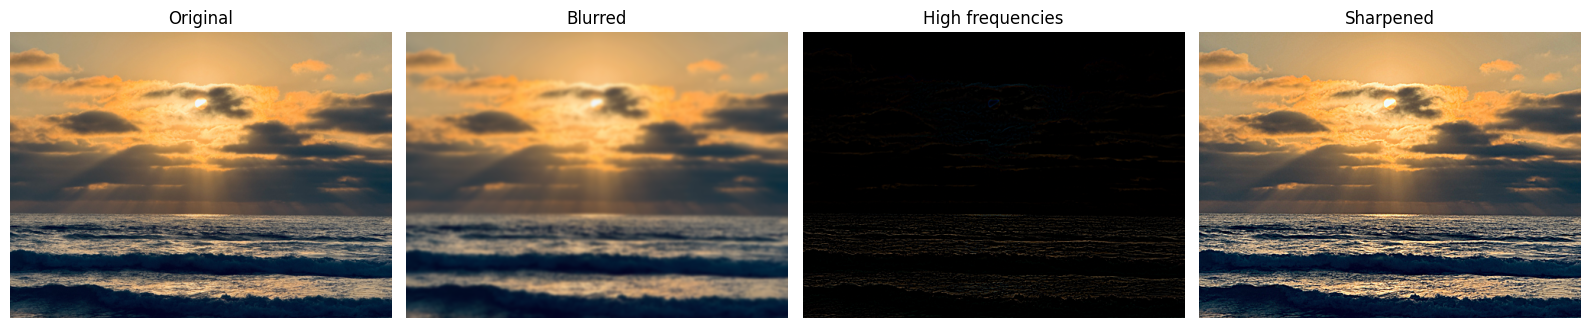

In [21]:
sunset = np.asarray(Image.open("../../img/sunset.jpg"))
process_img(sunset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3680758423575652..0.7697296501924092].


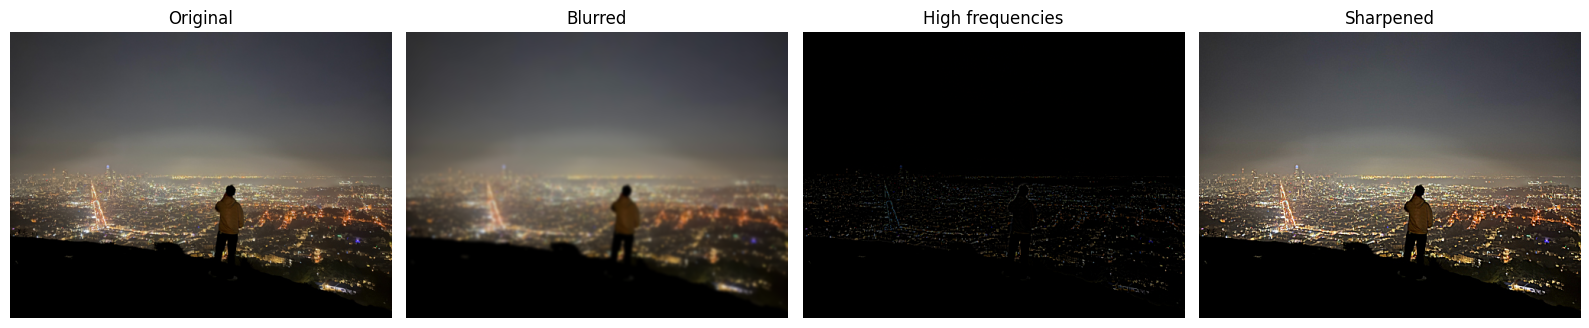

In [22]:
sf = np.asarray(Image.open("../../img/sf.jpg"))
process_img(sf)

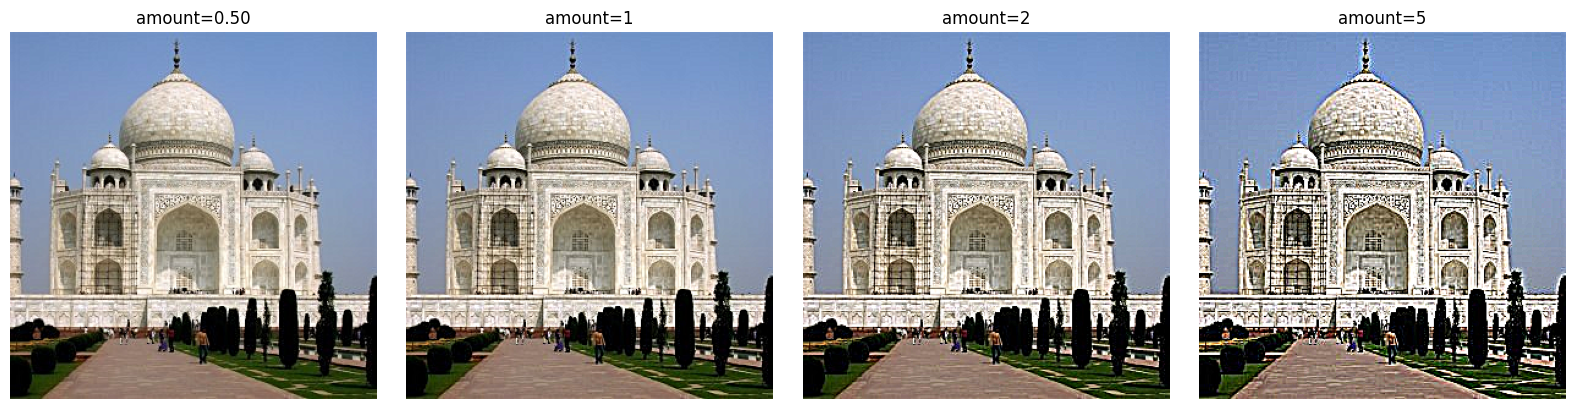

In [23]:
# compare amounts
taj = np.asarray(Image.open("../../img/taj.jpg"))

_, _, _, sharp050 = unsharp_mask(taj, amount=0.50)
_, _, _, sharp100 = unsharp_mask(taj, amount=1.00)
_, _, _, sharp200 = unsharp_mask(taj, amount=2.00)
_, _, _, sharp500 = unsharp_mask(taj, amount=5.00)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(sharp050)
axes[0].set_title("amount=0.50")

axes[1].imshow(sharp100)
axes[1].set_title("amount=1")

axes[2].imshow(sharp200)
axes[2].set_title("amount=2")

axes[3].imshow(sharp500)
axes[3].set_title("amount=5")

for a in axes:
    a.axis("off")

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14462463544976556..0.11417566035700455].


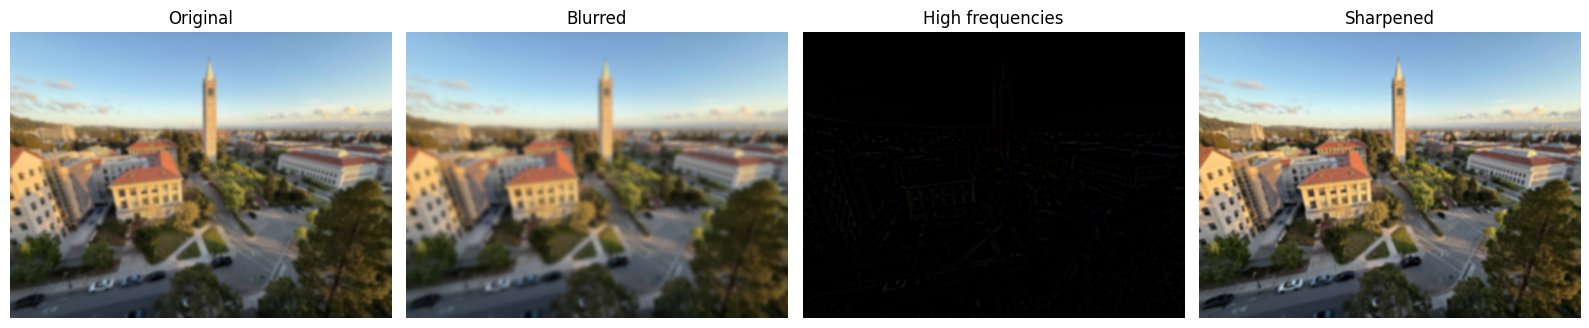

In [24]:
# sharpen a blurred image
campanile = np.asarray(campanile, dtype=np.float64)
campanile = campanile / campanile.max()

G = gaussian2d()
campanile_blurred = np.stack([signal.convolve2d(campanile[...,c], G, mode="same", boundary="symm", fillvalue=0.0) for c in range(3)], axis=2)

process_img(campanile_blurred)

## Part 2.2

Run locally as the interactive pop-ups are disabled.

## Part 2.3

In [25]:
def read_image(path):
    img = Image.open(path)
    out = np.asarray(img, dtype=np.float64)
    out = out / out.max()
    return out

In [30]:
def gaussian_stack(img, depth=8, sigma=1):
    g_stack = [img]
    for i in range(depth):
        k = int(3 * sigma) + 1
        G = gaussian2d(2 * k + 1, sigma)

        blurred = np.dstack([
            signal.convolve2d(g_stack[-1][..., c], G, mode="same", boundary="symm")
            for c in range(img.shape[2])
        ])
        g_stack.append(blurred)
        
        # g_stack.append(signal.convolve2d(g_stack[-1], G, mode="same"))
        sigma *= 2
    return g_stack

def stack(img, depth=8, sigma=1):
    g_stack, l_stack = [img], []
    for i in range(depth + 1):
        k = int(3 * sigma) + 1
        G = gaussian2d(2 * k + 1, sigma)
        
        blurred = np.dstack([
            signal.convolve2d(g_stack[-1][..., c], G, mode="same", boundary="symm")
            for c in range(img.shape[2])
        ])
        g_stack.append(blurred)
        
        # g_stack.append(signal.convolve2d(g_stack[-1], G, mode="same"))
        l_stack.append(g_stack[-2] - g_stack[-1])
        sigma *= 2
    return g_stack[:-1], l_stack

def spline(img1, img2, mask, img1_name=None, img2_name=None, depth=8, sigma=1):
    
    mask_gs = gaussian_stack(mask, depth=depth)

    img1_gs, img1_ls = stack(img1, depth=depth)
    img2_gs, img2_ls = stack(img2, depth=depth)

    spline_stack = []
    for i in range(depth + 1):
        l1 = img1_ls[i]
        l2 = img2_ls[i]
        m = mask_gs[i]

        m_l1 = m * l1
        m_l2 = (1 - m) * l2

        blended = m_l1 + m_l2
        spline_stack.append(blended)

        out = np.concatenate([l1, m_l1, blended, m_l2, l2], axis=1)
        lo, hi = out.min(), out.max()
        out = (out - lo) / (hi - lo)
        
        # img1_name = path1.split("/")[-1].split(".")[0]
        # img2_name = path2.split("/")[-1].split(".")[0]
        
        plt.imsave(f"../../out/{img1_name}+{img2_name}@depth{i}.png", img_as_ubyte(out))
        plt.show()

    residual = mask_gs[-1] * img1_gs[-1] + (1.0 - mask_gs[-1]) * img2_gs[-1]
    final = np.clip(residual + np.sum(spline_stack, axis=0), 0.0, 1.0)
    
    plt.imshow(np.concatenate([img1, final, img2], axis=1))
    plt.show()

    return final

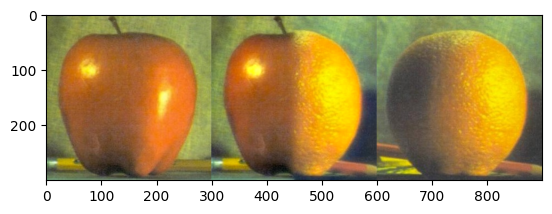

In [31]:
apple = read_image("../../img/2.3/apple.jpeg")
orange = read_image("../../img/2.3/orange.jpeg")

h, w, c = apple.shape
mask = np.concatenate([np.ones((h, int(math.floor(w / 2)), c)), np.zeros((h, int(math.ceil(w / 2)), c))], axis=1)

blended_im = spline(apple, orange, mask, "apple", "orange", depth=4)

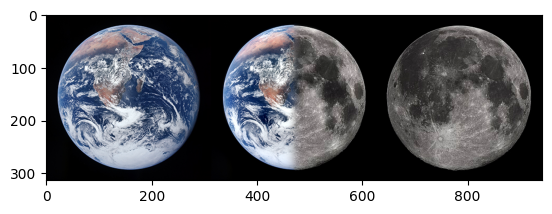

In [32]:
earth = read_image("../../img/2.3/earth.jpg")
moon = read_image("../../img/2.3/moon.jpg")

h, w, c = earth.shape
mask = np.concatenate([np.ones((h, int(math.floor(w / 2)), c)), np.zeros((h, int(math.ceil(w / 2)), c))], axis=1)

blended_im = spline(earth, moon, mask, "earth", "moon", depth=4)